In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
subject = '0001'
#img_dir1 = os.path.join(subject + '_1.jpg')
#img_dir2 = os.path.join(subject + '_2.jpg')
img_dir = os.path.join(subject + '.bmp')

In [3]:
img = np.array((Image.open(img_dir)).convert('L'))

In [325]:
def img_load(img_name):
    img_dir = os.path.join(img_name + '.bmp')
    try:
        return np.array((Image.open(img_dir)).convert('L'))
    except:
        print(" not exist path. ", img_dir)
    

In [4]:
img.shape

(256, 320)

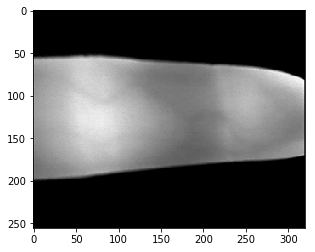

In [5]:
plt.imshow(img, 'gray')

In [6]:
img_flatten = img.flatten()
img_flatten.shape

(81920,)

(array([41539.,   457.,   462.,  1348.,  8556.,  9184.,  9776.,  6243.,
         3731.,   624.]),
 array([  0. ,  22.9,  45.8,  68.7,  91.6, 114.5, 137.4, 160.3, 183.2,
        206.1, 229. ]),
 <a list of 10 Patch objects>)

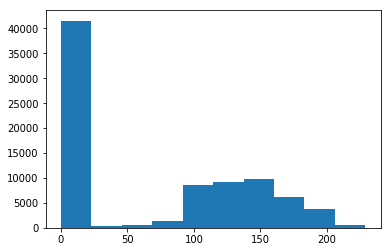

In [7]:
plt.hist(img_flatten)

In [8]:
img_size = img_flatten.shape[0]

In [9]:
def test1(img : np.ndarray):
    img_x, img_y = img.shape
    img_flatten = img.flatten()
    img_size = img_flatten.shape[0]
    for p in range(img_size):
        if (img_flatten[p] < 150):
            img_flatten[p] = clamping(img_flatten[p] - 50)
    img_return = np.reshape(img_flatten, [img_x, img_y])
    return img_return

In [10]:
def clamping(pixel):
    if pixel < 0 :
        return 0
    elif pixel > 255:
        return 255
    else:
        return pixel

In [11]:
img_test1 = test1(img)

In [12]:
img_test1.shape

(256, 320)

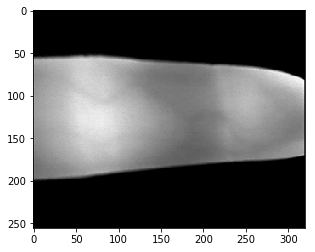

In [85]:
plt.imshow(img, 'gray')

In [379]:
def gamma_correction(array : np.ndarray, gamma_val, value = 255, bins = 256):
    _, plot = plt.subplots(2, 2, figsize = (10, 8))
    plot[1,0].imshow(array, 'gray')
    plot[0,1].hist(array.flatten(), color='blue')
    
    input_plot = np.linspace(0, bins-1, bins)
    plot[0,0].plot(input_plot, color = 'blue')
    output_plot = input_plot
    
    for i in range(bins-1):
        if(input_plot[i] < value):
            output_plot[i] = pow(input_plot[i]/bins, gamma_val) * bins
    plot[0,0].plot(output_plot, color = 'red')
    
    y = array.flatten()/bins
    for i in range(y.shape[0]):
        if(y[i] < value):
            y[i] = pow(y[i], gamma_val)
    y *= bins
    plot[0,1].hist(y, color = 'red', alpha = 0.8)
    y = np.reshape(y, array.shape)
    plot[1,1].imshow(y, 'gray')
    
    plt.show()
    return y

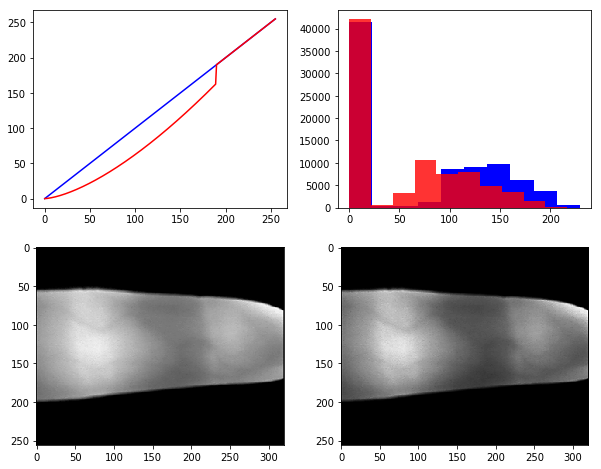

In [356]:
test1_array = gamma_correction(img, 1.5)

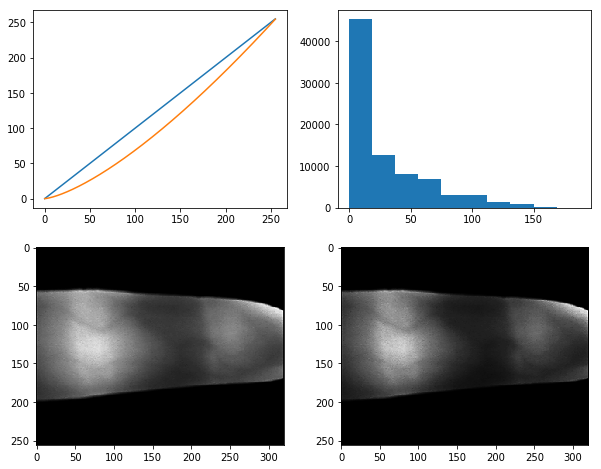

In [128]:
test2_array = gamma_correction(test1_array, 1.4)

In [208]:
flat_test = img.flatten()
print(flat_test.shape)
print(flat_test[20000])

(81920,)
95


In [350]:
def hist_equlizer(array : np.ndarray, bins = 256):
    _, plot = plt.subplots(2, 2, figsize = [10,8])
    plot[0,0].hist(array.flatten(), color = 'blue')
    plot[1,0].imshow(array, 'gray')
    flat = array.flatten()
    size = flat.shape[0]
    hist = np.histogram(flat, bins = bins-1, range=(0,bins-1))
    
    hist_sum = np.zeros(bins)
    sum_v = 0
    temp = 0
    for i in range(0, bins-1):
        sum_v += hist[0][i]
        hist_sum[i] = sum_v
    for i in range(size):
        temp = flat[i].astype(int)
        flat[i] = (hist_sum[temp]*(bins-1)) / size
    equlizer_array = np.reshape(flat, array.shape)
    plot[0,1].hist(equlizer_array.flatten())
    plot[1,1].imshow(equlizer_array, 'gray')
    return equlizer_array

In [319]:
def imshow(array : np.ndarray):
    _, plot = plt.subplots(2, figsize=[10,8])
    plot[0].imshow(array, 'gray')
    plot[1].hist(array.flatten())

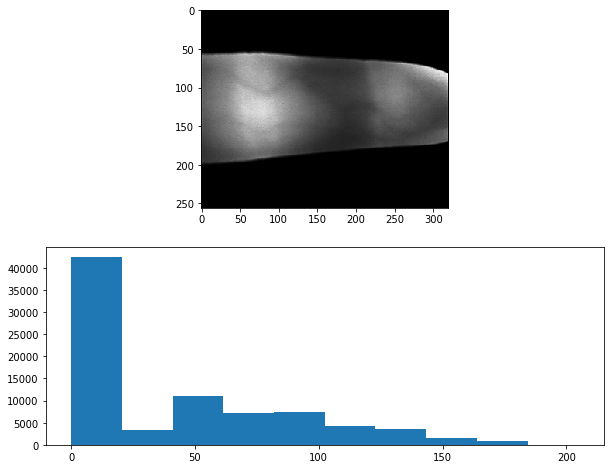

In [322]:
imshow(test1_array)

In [327]:
img2 = img_load('0343')

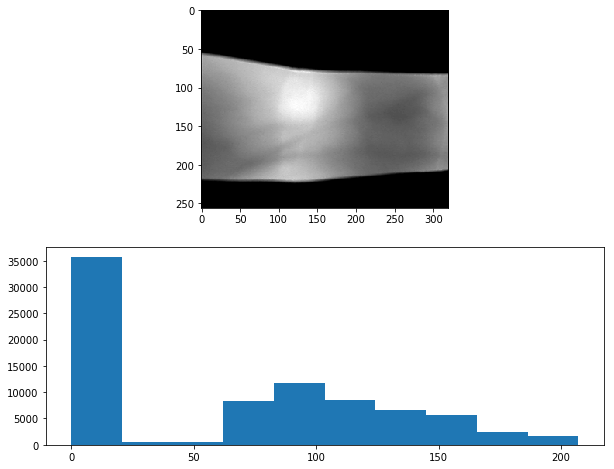

In [328]:
imshow(img2)

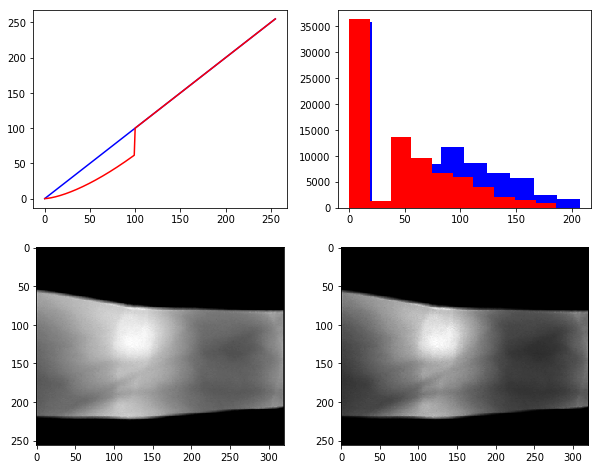

In [347]:
test1_img2 = gamma_correction(img2, gamma_val = 1.5, value = 100, bins = 256)

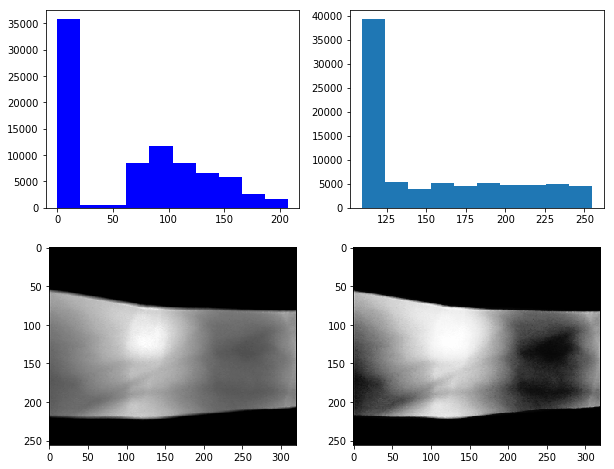

In [351]:
test2_img2 = hist_equlizer(img2)

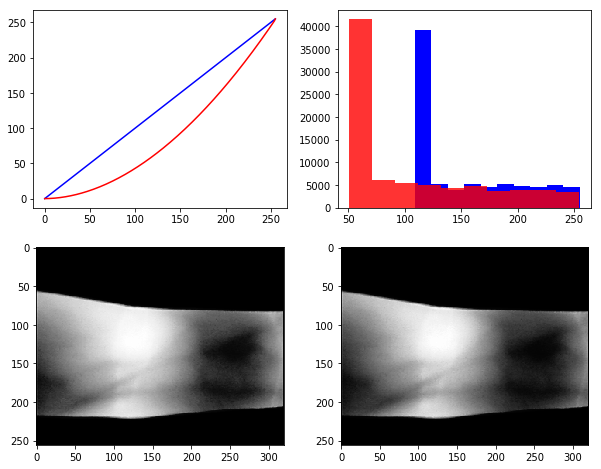

In [358]:
test3_img2 = gamma_correction(test2_img2, 1.9, 255)

In [377]:
def hist_stretching(array : np.ndarray, low=0, high=255, mode='stretching'):
    _, plot = plt.subplots(2, 2, figsize=[10,8])    
    flat = array.flatten()
    plot[0,0].hist(flat, range=[0, 255], color = 'blue')
    plot[1,0].imshow(array, 'gray')
    if mode == 'end_in':
        for i in range(flat.shape[0]):
            if flat[i] < low:
                flat[i] = 0
            elif flat[i] > high:
                flat[i] = 255
            else:
                flat[i] = (flat[i] - low) * 255 / (high-low)
    else:
        low = np.min(flat)
        high = np.max(flat)
        for i in range(flat.shape[0]):
            flat[i] = (flat[i] - low) * 255 / (high-low)
        
    plot[0,1].hist(flat, range=[0, 255], color = 'red')
    y = np.reshape(flat, array.shape)
    plot[1,1].imshow(y, 'gray')
    return y
    

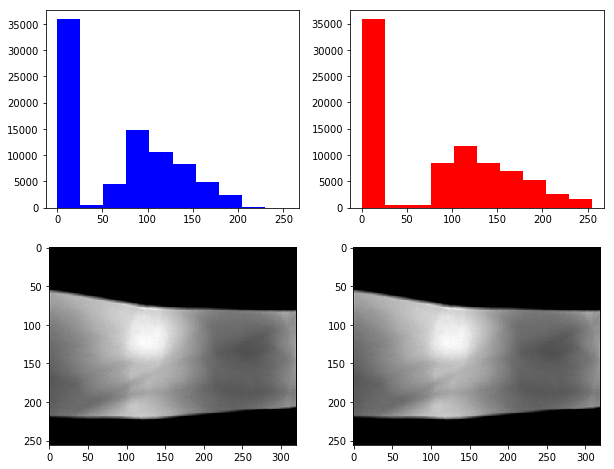

In [378]:
img2_stret = hist_stretching(img2)

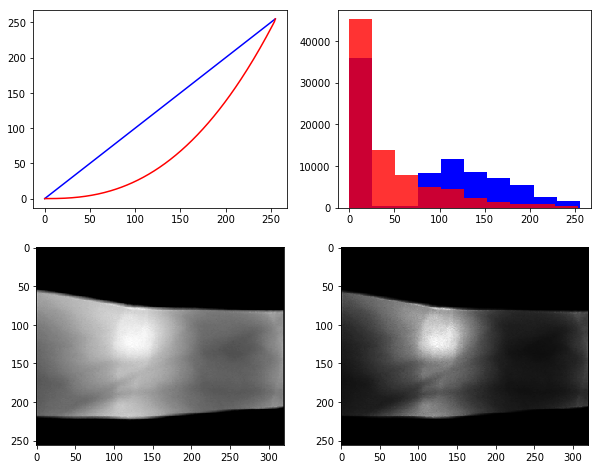

In [382]:
img2_stret_gamma = gamma_correction(img2_stret, 2.5)

In [383]:
img3 = img_load('4104')

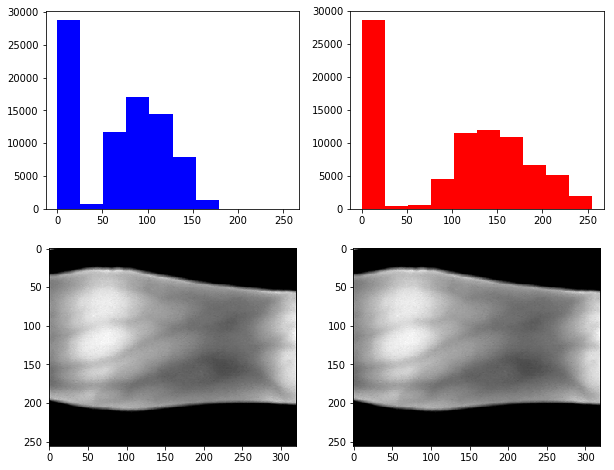

In [385]:
img3_stret = hist_stretching(img3)

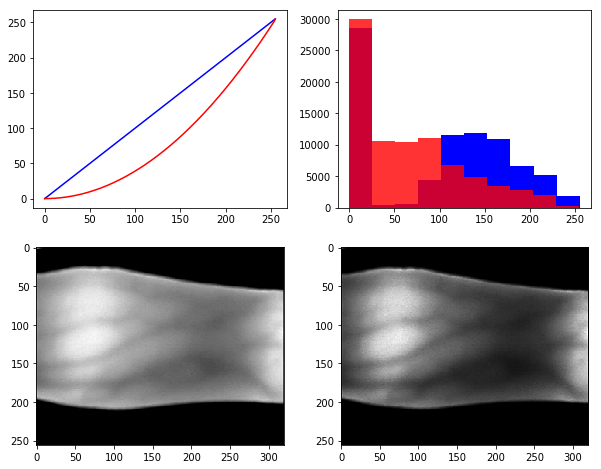

In [386]:
img3_stret_gamma = gamma_correction(img3_stret, 2.0)